# <img src="./assets/course-icon.png" style="height:50px;display:inline"> Deep Learning
---

create by Arwin Yu

## Tutorial 03  - Recurrent Neural Networks - Sequential Tasks
---
<center><img src="./assets/rnn_1.jpg" style="height:200px"></center>

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* 自然语言处理和序列数据(Natural Language Processing and Sequences)
    * 语言模型
    * 词嵌入
    * 任务类型
    * 文本预处理
* 循环神经网络(Recurrent Neural Networks)
* 长短期记忆网络(LSTM)
* 门控循环单元(GRU)
* 示例（PyTorch RNN Model Example）

## <img src="https://img.icons8.com/nolan/64/language.png" style="height:50px;display:inline"> 自然语言处理和序列数据
---

* 序列建模是建模序列的领域，例如文本句子、视频、股票价格、强化学习或自动驾驶中的轨迹、天气预报等……
* 与我们之前假设的数据是独立同分布的不同，序列中通常并非如此（例如，如果你随机改变句子中的单词，就很难理解它的含义）。
* 我们将重点关注自然语言处理 (NLP) 领域的文本数据。

#### 语言模型（Language Models）
---
语言模型是一种用来评估一段文本出现概率的工具。例如，给定一段文本“我喜欢人工智能”，语言模型可以计算出这段文本的概率，即$p(我, 喜欢, 人工, 智能)$。

为了简化计算，最常见的方法是利用概率分解的基本原则和马尔可夫假设，将复杂的概率分布拆解成多个条件概率的乘积，

即
p(我,喜欢,人工,智能)=p(我)p(喜欢∣我)p(人工∣喜欢)p(智能∣人工)。这样，计算每个词的出现概率只需要考虑它前一个词的情况。

然而，这种方法存在一些不必要的假设。马尔可夫假设认为每个词的出现只依赖于前一个词，而忽略了整个句子的历史信息。实际上，某个词的出现可能与更早之前的词有关，而不仅仅是前一个词。因此，马尔可夫假设在某些情况下可能过于简化，无法捕捉到语言的复杂性。

<center><img src="./assets/lang_model.gif" style="height:250px"></center>

* <a href="https://medium.com/perceptronai/recurrent-neural-network-an-introduction-for-beginners-1c13a541c906">Image Source</a>

#### 词嵌入（Word embeddings）
---
* 实际上，存在一些经典的机器学习方法或数学模型来构建语言模型，但本课程的重点是深度学习，因此我们将把经典方法留给大家进行探索，可以参考网上各种 NLP 课程。
* 我们提出的第一个问题是：如何将字符串（字符/单词）转换为可以输入神经网络的数字？
* 这种转换通常称为**嵌入（Embeddings）**。

* PyTorch 中的嵌入层：<a href="https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html">`nn.Embedding(num_embeddings, embedding_dim)`</a>。
* 有几种预先训练好的模型，例如 BERT 或 Word2Vec，它们已经训练了具有某些目标的词嵌入，并已准备好用于下游任务。


one-hot编码形式的词嵌入：

<center><img src="./assets/embedding_1.png" style="height:250px"></center>
<a href="https://www.shanelynn.ie/get-busy-with-word-embeddings-introduction/">Image Source</a>

对于给定的词 $w$ ，嵌入矩阵（Embedding Matix） $E$ 是一个权重矩阵（weight Matix），它将词的独热 (1-hot) 表示 $o_w$ 映射到其嵌入 $e_w$ ，具体如下:
$$
e_w=E o_w
$$

tips: 嵌入矩阵的学习可以通过目标/上下文似然模型完成。

<center><img src="./assets/embedding_2.png" style="height:250px"></center>
<a href="https://www.tylercrosse.com/ideas/semantic-search">Image Source</a>

<center><img src="./assets/lookup_table.gif" style="height:250px"></center>
<a href="https://lena-voita.github.io/nlp_course/word_embeddings.html">Image Source</a>

<center><img src="./assets/emb1.png" style="height:400px"></center>

### Word2vec

Word2vec 是一个框架，旨在通过估计给定词被其他词包围的可能性来学习词嵌入。常见的模型包括 skip-gram、负采样（negative sampling）和 CBOW（连续词袋模型）。

下图中展示了 Word2vec 的基本工作流程：

<center><img src="./assets/word2vec.png" style="height:300px"></center>

训练网络执行代理任务：左图显示了一个网络在执行代理任务（例如预测一个词的上下文词）时的训练过程。输入的是一个句子片段“...A cute teddy bear is reading...”，通过神经网络学习该句子中各词的关系。

提取高级表示：中图展示了在训练过程中提取到的词的高级表示。这些表示保留了词之间的语义关系。

计算词嵌入：右图展示了最终得到的词嵌入，例如“teddy bear”与“soft”、“art”、“Persian poetry”等词的关系。这些词嵌入可以用于各种自然语言处理任务。

- Skip-gram

Skip-gram Word2vec 模型是一种有监督的学习任务，通过评估给定目标词 $t$ 与上下文词 $c$ 同时出现的可能性来学习词嵌入。记 $\theta_t$ 为与目标词 $t$ 相关的参数，目标词 $t$ 在给定上下文词 $c$ 时的概率 $P(t \mid c)$ 表示如下:
$$
P(t \mid c)=\frac{\exp \left(\theta_t^T e_c\right)}{\sum_{j=1}^{V \mid} \exp \left(\theta_j^T e_c\right)}
$$

CBOW（连续词袋模型） 是另一种 Word2vec 模型，与Skip-gram的逻辑正好想反，它使用周围的词来预测给定的词。

- Negative sampling 

负采样是一组使用逻辑回归的二元分类器，旨在评估给定上下文词和给定目标词同时出现的可能性。模型在 $k$ 个负样本和 1 个正样本的集合上进行训练。给定一个上下文词 $c$和一个目标词 $t ，$ 预测表示如下:
$$
P(y=1 \mid c, t)=\sigma\left(\theta_t^T e_c\right)
$$

- GloVe 

“Global Vectors for Word Representation”（全局词向量表示）的简称，是一种用于生成词嵌入的方法。它通过使用共现矩阵$X$来实现， 共现矩阵 $X$ 记录了词与词之间在一定上下文窗口内共同出现的次数。例如，假设我们有一个单词"apple"和它的上下文词"fruit"，如果“apple"和“fruit"在大量文本中经常一起出现，那么 $X_{i, j}$ 的值会很高。GloVe 通过分析大量文本中词与词共同出现的频率，来生成每个词的向量表示。这些向量可以捕捉到词与词之间的语义关系，尽管每个向量的具体数值可能不容易解释其实际意义。具体而言，GloVe的损失函数设计如下:
$$
J=\sum_{i, j=1}^V f\left(X_{i, j}\right)\left(w_i^T \cdot \tilde{w}_j+b_i+\tilde{b}_j-\log X_{i, j}\right)^2
$$

其中:
- $V$是词汇表的大小。
- $w_i$和$\tilde{w}_j$分别是词$i$和词$j$的词向量。
- $b_i$和$\tilde{b}_j$是词$i$和词$j$的偏置项。
- $\log X_{i,j}$是词$i$和词$j$共现次数的对数。
- $f(X_{i,j})$是一个权重函数，用来减少共现次数过少的词对损失函数的影响。

#### Forms of Sequence Prediction Tasks
---

<center><img src="./assets/rnntask.png""></center>

<a href="https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks#/">Image Source</a>

## <img src="https://img.icons8.com/bubbles/50/000000/connection-sync.png" style="height:50px;display:inline"> Text Preprocessing
---
* 在深入研究具体模型之前，我们需要了解如何处理文本数据，因为你不能直接将单词输入神经网络，还需要为它们提供一些数字表示。
* 在经典 NLP 中，单词有时表示为独热向量，其中向量的大小是词汇量。
* 一般步骤如下：
* 将文本作为字符串加载到内存中。
* **标记化(Tokenization)**：将字符串拆分为tokens（例如，单词、单词的部分和字符）。
* **词汇表(Vocabulary)**：构建词汇表以将拆分的 token 映射到数字索引，以便模型可以轻松操作它们。

* 我们将使用 PyTorch 官方库 <a href="https://pytorch.org/text/stable/index.html">`torchtext`</a> 来处理文本数据。
* 我们使用 IMDB 数据集：该数据集包含标记为“正面”和“负面”（分别表示好评和差评）的电影评论。
* 此任务在 NLP 中称为**情绪分析**，本质上是一个分类任务。
* 如果你想加载其他数据集或从文本文件创建自定义数据集：
* https://pytorch.org/tutorials/beginner/torchtext_custom_dataset_tutorial.html
* https://pytorch.org/text/stable/datasets.html
* https://pytorch.org/data/beta/torchdata.datapipes.iter.html#text-datapipes
* **特殊标记**：
* `<sos>`/`<bos>` - 标记句子的**开始/开始**的标记。
*<pad>` - 用来**pad**的句子比批处理中最长的句子。单词，或者您决定遗漏一些单词，例如名字）。

<center><img src="./assets/pad_token.jpg" style="height:300px"></center>

<a href="https://livebook.manning.com/book/natural-language-processing-in-action/chapter-10/">Image Source</a>

右图展示了通过动态批处理来处理不同长度的序列的方法。虽然在每个批次内部进行了填充对齐，但不同批次之间可以有不同的长度，从而减少计算中的填充浪费，提高计算效率。同时，批处理不会改变序列在原文中的顺序，只是为了计算优化进行的分组。

## <img src="https://img.icons8.com/nolan/64/re-enter-pincode.png" style="height:50px;display:inline"> Recurrent Neural Networks (RNNs)
---
* **循环神经网络 (RNN)** 的理念：保存某一时刻的输出并将其反馈给下一时刻的输入。
* 在每个时间步骤中，我们都会维护一些状态（从上一个时间步骤接收）——**hidden state 隐藏状态**，它代表我们迄今为止所读的内容。这与当前正在阅读的单词相结合，并在稍后的状态中使用。然后，我们根据需要重复此过程，直至达到所需的时间步骤。

<center><img src="./assets/rnn_2.gif" style="height:300px"></center>

* <a href="https://medium.com/perceptronai/recurrent-neural-network-an-introduction-for-beginners-1c13a541c906">Image Source</a>

* 令 $x$ 表示输入层，$h$ 表示隐藏层，$y$ 表示输出层。
* 令 $A, B \text{ 和 } C$ 为用于改善模型输出的一些网络参数。
* 在任何给定时间 $t$，当前输入是 $x(t)$ 和 $x(t-1)$ 处的输入组合。

<center><img src="./assets/rnn_3.gif" style="height:250px"></center>

* <a href="https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn">Image Source</a>

<center><img src="./assets/rnn_5.png" style="height:200px"></center>

#### The Hidden State of RNN Cells
---
* 对于输入序列中的每个元素，每一层计算以下函数: $$ h_t = tanh\left(W_{ih}x_t +b_{ih} + W_{hh}h_{(t-1)} + b_{hh}\right), $$ 其中 $h_t$ 是时间 $t$ 的隐藏状态，$x_t$ 是时间 $t$ 的输入，$h_{(t-1)}$ 是时间 $t-1$ 时前一层的隐藏状态或时间 0 时的初始隐藏状态。

<center><img src="./assets/rnn_4.gif" style="height:250px"></center>

* Image by Michael Nguyen

RNN的两个常见变体

<center><img src="./assets/vrnns.png" style="height:400px"></center>

#### <img src="https://img.icons8.com/?size=100&id=91CnU00i6HLv&format=png&color=000000" style="height:50px;display:inline"> 这两个变体的设计动机是？
---

### <img src="https://img.icons8.com/dusk/64/000000/memory-slot.png" style="height:50px;display:inline"> Long Term Short Memory (LSTM)
---

* 在反向传播过程中，RNN 会遭受梯度消失问题的影响，这实质上会产生**短期记忆**。
* 长短期记忆 (LSTM) 是一种试图保存长期信息的循环单元。
* LSTM 引入了一种与隐藏状态形状相同的记忆单元，旨在记录更多信息。
* 记忆由 3 个主要门控制：

    **输入门**：决定何时将数据读入单元。

    **输出门**：输出单元中的条目。

    **遗忘门**：一种重置单元内容的机制。
    
* 这些门会了解在训练过程中哪些信息与遗忘或记住有关。这些门包含一个 S 形激活函数（sigmoid）。

<center><img src="./assets/lstm_1.svg" style="height:250px"></center>

#### Memory Cell
---
* LSTM 在每个时间步 $t$ 上接收一个输入向量 $\boldsymbol{x}_t$, 更新其细胞状态 $\boldsymbol{C}_t$ 和隐藏状态 $\boldsymbol{h}_t$ 。其中, 细胞状态 (cell state) 是 LSTM 的新概念，有时候也被称为候选记忆单元 $\tilde{C}_t$ (candidate memory cell), 它类似于传送带, 是 LSTM 的关键, 直接贯穿整个模型, $C_t$ 在传递中只有一些少量的线性交互, 使得信息在上面传递很容易，这对远距离的信息更好的传递到当前计算时刻有很大帮助。也就是长短期记忆网络名字中对“长期”概念的一种实现。
* 具体来说，输入门 $I_t$ 控制我们通过 $\tilde{C}_t$ 考虑多少新数据，而遗忘门 $F_t$ 决定我们保留了多少旧记忆单元内容 $C_{t-1}$。由此得出： $$ C_t = F_t \odot C_{t-1} + I_{t} \odot \tilde{C}_t$$
* $\odot$ 是元素乘积运算符 (Hadamard)。
* 如果遗忘门始终近似为 1，输入门始终近似为 0，则过去的记忆单元 $C_{t-1}$ 将随时间保存并传递到当前时间步骤。
* 引入这种设计可以缓解消失梯度问题（memory cell路径中经历的计算比hidden state少一次相乘），并更好地捕获序列内的长距离依赖关系。
* 最后，时间 $t$ 的隐藏状态： $$ H_t = O_t \odot \text{tanh}(C_t)。$$

<center><img src="./assets/lstm_2.gif" style="height:350px"></center>

* <a href="https://becominghuman.ai/long-short-term-memory-part-1-3caca9889bbc">Image Source</a>

在 LSTM 的计算过程中, 第一步决定我们会从上一时刻的隐藏状态中丟弃（忘记）什么信息。如图, 其中 $\sigma$被称作遗忘门 (forget gate), 本质上是一个带有 Sigmoid 函数的神经网络层, 通过读取 $\boldsymbol{h}_{t-1}$ 和 $\boldsymbol{x}_t$, 输出一个在 0 到 1 之间的数值给到细胞状态 $\boldsymbol{C}_{t-1}$ 。通过相乘的操作来决定保留多少 $\boldsymbol{C}_{t-1}$ 中的信息, 1 表示保留全部信息, 0 表示遗忘全部信息。公式表示如下
$$
f_t=\sigma\left(\boldsymbol{W}_f *\left[\boldsymbol{h}_{t-1}, \boldsymbol{x}_t\right]+b_f\right)
$$
<center><img src="./assets/fgate.png" style="height:300px"></center>

第二步决定会从当前时刻的输入信息中, 选择什么信息进行处理, 如图4-9。其中 $\sigma$ 被称作输入门 input $i_t$, 公式表示如下:
$$
\boldsymbol{i}_t=\sigma\left(\boldsymbol{W}_i \cdot\left[\boldsymbol{h}_{t-1}, \boldsymbol{x}_t\right]+b_i\right)
$$

<center><img src="./assets/igate.png" style="height:300px"></center>

第三步, 使用 $\tanh$ 激活函数创建一个新的候选细胞状态 $\tilde{\boldsymbol{C}}_t$, 如图4-10所示。本质上是一个带有 $\tanh$ 函数的神经网络层, 通过读取 $\boldsymbol{h}_{t-1}$ 和 $\boldsymbol{x}_t$ ，输出 $\tilde{\boldsymbol{C}}_t$, 这个 $\tilde{\boldsymbol{C}}_t$ 可以一定程度上代表 $\left[\boldsymbol{h}_{t-1}, \boldsymbol{x}_t\right]$, 即代表输入信息, 公式表示如下:
$$
\tilde{\boldsymbol{C}}_t=\tanh \left(\boldsymbol{W}_C \cdot\left[\boldsymbol{h}_{t-1}, \boldsymbol{x}_t\right]+b_C\right)
$$

<center><img src="./assets/ccs.png" style="height:300px"></center>

最后一步, 决定着当前时刻隐藏状态的输出结果, 如图4-11所示。其中 $\sigma$ 被称作输出门 (forget gate), 本质上还是一个带有 Sigmoid 函数的神经网络层, 它的计算结果决定着当前时刻的输出结果有多少比例能进入到下一时刻。具体来说, 输出门的计算结果, 将与更新后的且经过激活函数 $\tanh$ 映射后的细胞状态 $\boldsymbol{C}_t$ 相乘, 作为当前时刻隐藏状态 $\boldsymbol{h}_t$ 的输出结果。公式表示如下:
$$
\begin{gathered}
\boldsymbol{o}_t=\sigma\left(\boldsymbol{W}_o *\left[\boldsymbol{h}_{t-1}, \boldsymbol{x}_t\right]+b_o\right) \\
\boldsymbol{h}_t=\boldsymbol{o}_t \odot \tanh \left(\boldsymbol{C}_t\right)
\end{gathered}
$$

<center><img src="./assets/ogate.png" style="height:300px"></center>

In [18]:
rnn = nn.LSTM(input_size=10, hidden_size=20, num_layers=2)  # batch_first=False
x = torch.randn(5, 3, 10)  # 5 words per senetence, 3 sentences (batch_size), embedding dimension of each word is 10
h0 = torch.randn(2, 3, 20)  # initialize hidden states per layer
c0 = torch.randn(2, 3, 20)  # initialize memory per layer
output, (hn, cn) = rnn(x, (h0, c0))
print(f'shapes: output - {output.shape}, hidden - {hn.shape}, memory - {cn.shape}')

shapes: output - torch.Size([5, 3, 20]), hidden - torch.Size([2, 3, 20]), memory - torch.Size([2, 3, 20])


### <img src="https://img.icons8.com/color/96/000000/front-gate-open.png" style="height:50px;display:inline"> Gated Recurrent Unit (GRU)
---
* 与常规 RNN 不同，门控循环单元 (GRU) 支持隐藏状态的门控。
* GRU 有两种机制来控制何时应更新隐藏状态：
* **重置门**：允许控制应记住多少先前状态，有助于捕获序列中的短期依赖关系。
* **更新门**：允许控制新状态中有多少只是旧状态的副本，有助于捕获序列中的长期依赖关系。
* 与 LSTMS 不同，GRU 没有记忆组件，因此更新速度更快（从而可以加快训练速度），但通常 LSTM 表现更好。

<center><img src="./assets/gru_1.svg" style="height:300px"></center>

* 假设输入是给定时间步长 $t$ 的小批量 $X_t \in \mathbb{R}^{n\times d}$，前一个时间步长的隐藏状态是 $H_{t−1}\in \mathbb{R}^{n\times h}$。
* 重置门 $R_t \in \mathbb{R}^{n \times h}$ 和更新门 $Z_t \in \mathbb{R}^{n \times h}$ 计算如下： $$ R_t = \sigma(X_tW_{xr} + H_{t-1}W_{hr} +b_r), $$ $$ Z_t = \sigma(X_tW_{xz} + H_{t-1}W_{hz} +b_z), $$ 其中 $W_{xr}, W_{xz} \in \mathbb{R}^{d \times h}$ 和 $W_{hr}, W_{hz} \in \mathbb{R}^{h \times h}$ 为权重参数，$b_r, b_z \in \mathbb{R}^{1 \times h}$存在偏见。

#### GRUs Hidden State
---
* 时间步 $t$ 的 *候选* 隐藏状态 $\tilde{H}_{t} \in \mathbb{R}^{n \times h}$ 定义为： $$ \tilde{H}_{t} = \text{tanh}\left(X_t W_{xh} + (R_t \odot H_{t-1})W_{hh} \right) + b_h$$
* 结果为候选，因为我们仍需结合 *更新门* 的作用。
* 最后，新的隐藏状态 $H_t$ 和时间步 $t$ 中 GRU 的最终更新： $$ H_t = Z_t \odot H_{t-1} +(1-Z_t) \odot \tilde{H}_t。 $$
* 每当更新门 $Z_t$ 接近 1 时，我们只需保留旧状态。在这种情况下，来自 $X_t$ 的信息基本上被忽略，从而有效地跳过了依赖链中的时间步骤 $t$。
* 相反，每当 $Z_t$ 接近 0 时，新的潜在状态 $H_t$ 就会接近候选潜在状态 $\tilde{H}_t$。
* 这些设计可以帮助我们应对 RNN 中的梯度消失问题，并更好地捕获具有较大时间步长距离的序列的依赖关系。

In [19]:
rnn = nn.GRU(input_size=10, hidden_size=20, num_layers=2)  
x = torch.randn(5, 3, 10)  # 5 words per senetence, 3 sentences (batch_size), embedding dimension of each word is 10
h0 = torch.randn(2, 3, 20)  # initialize hidden states per layer
output, hn = rnn(x, h0)
print(f'shapes: output - {output.shape}, hidden - {hn.shape}')

shapes: output - torch.Size([5, 3, 20]), hidden - torch.Size([2, 3, 20])


### <img src="https://img.icons8.com/bubbles/50/000000/fire-element.png" style="height:50px;display:inline"> PyTorch RNN Model Example
----
Following is an example of building a classifier with LSTMs.

In [20]:
#环境配置
# -*- coding: utf-8 -*-
import numpy as np
import pickle as pkl
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import time
import torch
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 超参数设置
data_path =  './datasets/rnndata/data.txt'              
vocab_path = './datasets/rnndata/vocab.pkl'             
save_path = './datasets/rnndata/rnn.ckpt'                    
embedding_pretrained = torch.tensor(np.load('./datasets/rnndata/embedding_Tencent.npz')["embeddings"].astype('float32')) 
embed = embedding_pretrained.size(1)        
dropout = 0.5                              
num_classes = 2                             
num_epochs = 50                            
batch_size = 128                             
pad_size = 50                                
learning_rate = 1e-3                        
hidden_size = 128                            
num_layers = 2                               
MAX_VOCAB_SIZE = 10000                        

In [21]:
import pickle
import numpy as np

# 加载词汇表
with open('./datasets/rnndata//vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)

# 加载预训练词向量
embeddings = np.load('./datasets/rnndata/embedding_Tencent.npz')['embeddings']

# 示例：获取一个词的向量表示
word = '我'
if word in vocab:
    word_index = vocab[word]
    word_vector = embeddings[word_index]
    print(f"词 '{word}' 的向量表示是：", word_vector)
    print(word_vector.shape)
else:
    print(f"词 '{word}' 不在词汇表中")


词 '我' 的向量表示是： [ 0.25011599 -0.36695799  0.065014    0.010725    0.231398   -0.177817
  0.064359   -0.005259    0.115888    0.154       0.17193501  0.07247
 -0.003175   -0.09248     0.20276    -0.030792   -0.30699101 -0.289693
 -0.055264   -0.189153    0.122888    0.081699    0.017909    0.15846901
  0.14746401  0.079238   -0.224966    0.14583699  0.182973   -0.149864
 -0.15604401  0.044855   -0.237059    0.174146   -0.108293   -0.066462
  0.140773    0.092687   -0.124868   -0.026098    0.167881   -0.117048
  0.39074999 -0.036812   -0.051702   -0.161367   -0.355791   -0.311515
 -0.090306    0.084679   -0.18447199  0.090339   -0.098312    0.25659499
  0.29255399  0.27464801  0.039325    0.150774    0.239049   -0.011787
 -0.014104    0.13506199  0.151537   -0.208729   -0.171538    0.08003
 -0.116087    0.159768   -0.061878   -0.149166   -0.065586    0.029528
 -0.020271    0.098718   -0.068513    0.238489    0.174631   -0.003655
  0.161002   -0.002617    0.202535    0.276254    0.03933    

In [22]:
# dataset load
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

data_path = './datasets/rnndata/data.txt'

def load_raw_data(path):
    data = []
    with open(path, 'r', encoding='gbk') as f:
        for line in f:
            lin = line.strip()
            if not lin:
                continue
            label, content = lin.split('	####	')
            data.append((content, int(label)))
    return data

raw_data = load_raw_data(data_path)


In [23]:
def data_summary(data):
    print(f"数据集中样本数量: {len(data)}")
    lengths = [len(sample[0]) for sample in data]
    print(f"样本的平均长度: {np.mean(lengths):.2f}")
    print(f"样本的最大长度: {np.max(lengths)}")
    print(f"样本的最小长度: {np.min(lengths)}")

data_summary(raw_data)


数据集中样本数量: 119988
样本的平均长度: 66.05
样本的最大长度: 260
样本的最小长度: 3


In [24]:
for i in range(10):
    print(raw_data[i])

('?更博了，爆照了，帅的呀，就是越来越爱你！生快傻缺[爱你][爱你][爱你]', 1)
('@张晓鹏jonathan 土耳其的事要认真对待[哈哈]，否则直接开除。@丁丁看世界 很是细心，酒店都全部OK啦。', 1)
('姑娘都羡慕你呢…还有招财猫高兴……//@爱在蔓延-JC:[哈哈]小学徒一枚，等着明天见您呢//@李欣芸SharonLee:大佬范儿[书呆子]', 1)
('美~~~~~[爱你]', 1)
('梦想有多大，舞台就有多大![鼓掌]', 1)
('[花心][鼓掌]//@小懒猫Melody2011: [春暖花开]', 1)
('某问答社区上收到一大学生发给我的私信：“偶喜欢阿姨！偶是阿姨控！”我回他：“阿姨稀饭小盆友！偶是小盆友控！” [哈哈]', 1)
('吃货们无不啧啧称奇，好不喜欢！PS:写错一个字！[哈哈]@森林小天使-波琪 @SEVEN厦门摄影师 @日月星辰-心在路上 @每种型号生两胎 @志远天下行 @监控防盗安装XM @创意美食simon哥 @漫游者-强子 @陈小kitty猫@游子的歌@solo在厦门', 1)
('#Sweet Morning#From now on,love yourself,enjoy living then smile.从现在开始，爱自己，享受生活并且微笑。[呵呵] [嘻嘻] [哈哈] [挤眼] [太开心] 早安、甜心们', 1)
('【霍思燕剖腹产下“小江江” 老公落泪】今晨9时霍思燕产下一名男婴，宝宝重8斤3两，母子平安。杜江的脸上洋溢着做爸爸的欣喜：宝宝小名叫“小江江”，眼睛像他，鼻子和嘴巴则像霍思燕，看到宝贝就忍不住落泪！恭喜@杜江侦察记 @霍思燕 ，祝福“小江江”在爱里健康地成长[爱你]...http://t.cn/z8EwSPU', 1)


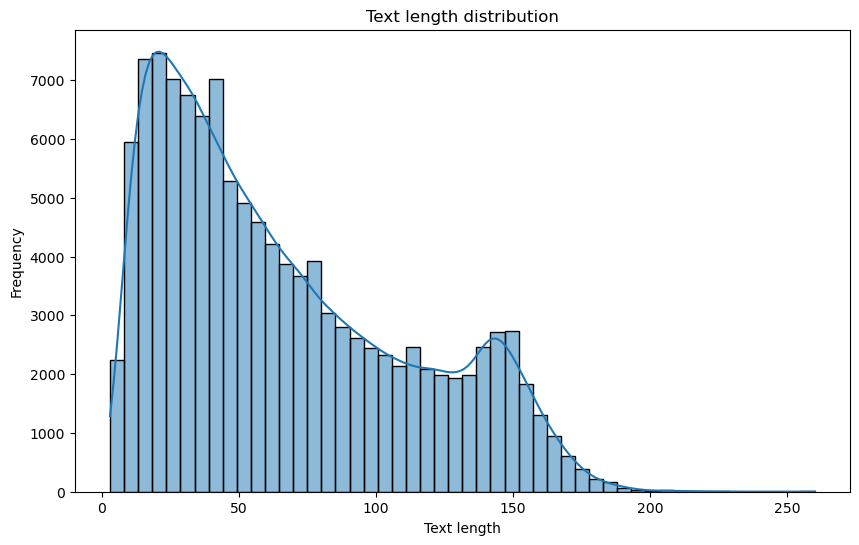

In [25]:
# 文本长度分布
def plot_length_distribution(data, title):
    lengths = [len(sample[0]) for sample in data]
    plt.figure(figsize=(10, 6))
    sns.histplot(lengths, bins=50, kde=True)
    plt.title(title)
    plt.xlabel("Text length")
    plt.ylabel("Frequency")
    plt.show()

plot_length_distribution(raw_data, "Text length distribution")


In [26]:
import re
# 定义常量
PAD = '<PAD>'
UNK = '<UNK>'
USER = '<USER>'
URL = '<URL>'
EMOJI = '<EMOJI>'

# 表情符号的正则表达式
emoji_pattern = re.compile(r'\[.*?\]')

def preprocess_text(text):
    # 去除URL
    text = re.sub(r'http[s]?://\S+', URL, text)
    # 替换@用户
    text = re.sub(r'@\S+', USER, text)
    # 替换表情符号
    text = emoji_pattern.sub(EMOJI, text)
    # 去除标点符号
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [27]:
#数据预处理
def load_dataset(path, pad_size, tokenizer, vocab):
    contents = [] 
    n=0
    with open(path, 'r', encoding='gbk') as f: 
        for line in tqdm(f):
            lin = line.strip() 
            if not lin: 
                continue
            label,content = lin.split('	####	') 
            content = preprocess_text(content)   
            words_line = [] 
            token = tokenizer(content) 
            # print(token)
            seq_len = len(token) 
            if pad_size:
                 
                if seq_len < pad_size:
                    token.extend([vocab.get(PAD)] * (pad_size - len(token))) 
                else:
                    token = token[:pad_size] 
                    seq_len = pad_size
            
            for word in token:
                words_line.append(vocab.get(word, vocab.get(UNK)))
            n+=1
            contents.append((words_line, int(label))) 
    train, X_t = train_test_split(contents, test_size=0.2, random_state=42) 
    dev,test= train_test_split(X_t, test_size=0.5, random_state=42)  
    return train,dev,test

def get_data(): 
    tokenizer = lambda x: [y for y in x]  #jieba
    vocab = pkl.load(open(vocab_path, 'rb'))  
    # print('tokenizer',tokenizer)
    print('vocab',vocab)
    print(f"Vocab size: {len(vocab)}") 

    train,dev,test = load_dataset(data_path, pad_size, tokenizer, vocab) 
    return vocab, train, dev, test

In [28]:
#定义数据集类，用于处理文本数据。
class TextDataset(Dataset):
    def __init__(self, data):
        self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 
        self.x = torch.LongTensor([x[0] for x in data]).to(self.device) 
        self.y = torch.LongTensor([x[1] for x in data]).to(self.device) 
    def __getitem__(self,index): 
        self.text = self.x[index] 
        self.label = self.y[index] 
        return self.text, self.label 
    def __len__(self):
        return len(self.x) 

In [29]:
# 定义 模型
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
       
        self.embedding = nn.Embedding.from_pretrained(embedding_pretrained, freeze=False)
 
        self.rnn = nn.RNN(embed, hidden_size, num_layers, bidirectional=True, batch_first=True, dropout=dropout)
 
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x): 
        out = self.embedding(x) 
        out, _ = self.rnn(out) 
        out = self.fc(out[:, -1, :]) #RNN的输出 out 形状为 (batch_size, seq_length, hidden_size * 2)
        return out

In [30]:
# 权重初始化，默认xavier
def init_network(model, method='xavier', exclude='embedding'):
    for name, w in model.named_parameters():
        if exclude not in name:
            if 'weight' in name:
                if method == 'xavier':
                    nn.init.xavier_normal_(w)
                elif method == 'kaiming':
                    nn.init.kaiming_normal_(w)
                else:
                    nn.init.normal_(w)
            elif 'bias' in name:
                nn.init.constant_(w, 0) 
            else:
                pass

In [31]:
#损失绘制
def plot_loss(train_loss):
    plt.figure(figsize=(10, 7)) 
    x = list(range(len(train_loss))) 
    plt.plot(x, train_loss, alpha=0.9, linewidth=2, label='train acc') 
    plt.xlabel('Epoch') 
    plt.ylabel('loss') 
    plt.legend(loc='best')  
#准确率绘制   
def plot_acc(train_acc):
    plt.figure(figsize=(10, 7))
    x = list(range(len(train_acc))) 
    plt.plot(x, train_acc, alpha=0.9, linewidth=2, label='train acc') 
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend(loc='best') 

In [32]:
from sklearn.metrics import accuracy_score
#定义模型训练
def train( model, dataloaders):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
    loss_function = torch.nn.CrossEntropyLoss() 

    dev_best_loss = float('inf')  

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 
    print("Start Training...\n")
 
    plot_train_acc = []
    plot_train_loss = []
 
    for i in range(num_epochs):
        step = 0  
        train_lossi=0 
        train_acci = 0 
        for inputs, labels in dataloaders['train']: 
            model.train() 
 
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()  
            outputs = model(inputs)  
            loss = loss_function(outputs, labels) 
            loss.backward() 
            optimizer.step()

            step += 1  
            true = labels.data.cpu() 
            predic = torch.max(outputs.data, 1)[1].cpu() 
      
            train_lossi += loss.item()
            train_acci += metrics.accuracy_score(true, predic)
        #对验证集进行评估    
        dev_acc, dev_loss = dev_eval(model, dataloaders['dev'], loss_function,Result_test=False)
        if dev_loss < dev_best_loss:
            dev_best_loss = dev_loss
            torch.save(model.state_dict(), save_path)
        
        train_acc = train_acci/step
        train_loss = train_lossi/step
        
        plot_train_acc.append(train_acc)
        plot_train_loss.append(train_loss)
        
        print("epoch = {} :  train_loss = {:.3f}, train_acc = {:.2%}, dev_loss = {:.3f}, dev_acc = {:.2%}".
                  format(i+1, train_loss, train_acc, dev_loss, dev_acc))
    
    plot_loss(plot_train_loss)
    plot_acc(plot_train_acc)
    # 加载最佳模型参数并在测试集上进行评估
    model.load_state_dict(torch.load(save_path))#模型加载
    model.eval()#设置验证模型
    test_acc, test_loss = dev_eval(model, dataloaders['test'], loss_function,Result_test=True)#输出准确率和损失
    print('================'*8)
    print('test_loss: {:.3f}      test_acc: {:.2%}'.format(test_loss, test_acc))

# 对测试结果进行分析
def result_test(real, pred):
    acc = accuracy_score(real, pred)#准确率计算

# 模型评估函数定义
def dev_eval(model, data, loss_function,Result_test=False):

    model.eval() 
    loss_total = 0  
    predict_all = np.array([], dtype=int) 
    labels_all = np.array([], dtype=int) 
    with torch.no_grad():
        # 遍历数据集
        for texts, labels in data:
            outputs = model(texts)  
            loss = loss_function(outputs, labels) 
            loss_total += loss.item()
            labels = labels.data.cpu().numpy() 
            predic = torch.max(outputs.data, 1)[1].cpu().numpy() 
             
            labels_all = np.append(labels_all, labels)
            predict_all = np.append(predict_all, predic)
    # 计算准确率
    acc = metrics.accuracy_score(labels_all, predict_all)
    # 如果需要进行测试结果分析，则调用result_test函数
    if Result_test:
        result_test(labels_all, predict_all)
    else:
        pass
     # 返回准确率和平均损失
    return acc, loss_total / len(data)

Loading data...
vocab {' ': 0, '0': 1, '1': 2, '2': 3, '：': 4, '大': 5, '国': 6, '图': 7, '(': 8, ')': 9, '3': 10, '人': 11, '年': 12, '5': 13, '中': 14, '新': 15, '9': 16, '生': 17, '金': 18, '高': 19, '《': 20, '》': 21, '4': 22, '上': 23, '8': 24, '不': 25, '考': 26, '一': 27, '6': 28, '日': 29, '元': 30, '开': 31, '美': 32, '价': 33, '发': 34, '学': 35, '公': 36, '成': 37, '月': 38, '将': 39, '万': 40, '7': 41, '基': 42, '市': 43, '出': 44, '子': 45, '行': 46, '机': 47, '业': 48, '被': 49, '家': 50, '股': 51, '的': 52, '在': 53, '网': 54, '女': 55, '期': 56, '平': 57, '房': 58, '名': 59, '三': 60, '-': 61, '会': 62, '地': 63, '场': 64, '全': 65, '小': 66, '现': 67, '有': 68, '分': 69, '后': 70, '称': 71, '组': 72, '为': 73, '下': 74, '盘': 75, '最': 76, '“': 77, '”': 78, '手': 79, '天': 80, '本': 81, '利': 82, '首': 83, '战': 84, '长': 85, '游': 86, '海': 87, '主': 88, '起': 89, '动': 90, '北': 91, '资': 92, '售': 93, '能': 94, '重': 95, '时': 96, '男': 97, '力': 98, '居': 99, '报': 100, '点': 101, '自': 102, '布': 103, '.': 104, '推': 105, '前': 106, 'C': 107, '产': 10

14002it [00:00, 46239.08it/s]119988it [00:03, 37652.90it/s]


Time usage: 3.715178966522217
Start Training...

epoch = 1 :  train_loss = 0.710, train_acc = 50.87%, dev_loss = 0.686, dev_acc = 53.61%
epoch = 2 :  train_loss = 0.693, train_acc = 52.07%, dev_loss = 0.695, dev_acc = 50.37%
epoch = 3 :  train_loss = 0.690, train_acc = 52.64%, dev_loss = 0.703, dev_acc = 52.38%
epoch = 4 :  train_loss = 0.690, train_acc = 52.29%, dev_loss = 0.696, dev_acc = 52.15%
epoch = 5 :  train_loss = 0.688, train_acc = 52.53%, dev_loss = 0.704, dev_acc = 52.01%
epoch = 6 :  train_loss = 0.684, train_acc = 52.87%, dev_loss = 0.700, dev_acc = 52.65%
epoch = 7 :  train_loss = 0.685, train_acc = 53.21%, dev_loss = 0.694, dev_acc = 53.20%
epoch = 8 :  train_loss = 0.681, train_acc = 53.68%, dev_loss = 0.711, dev_acc = 51.15%
epoch = 9 :  train_loss = 0.679, train_acc = 53.93%, dev_loss = 0.705, dev_acc = 52.41%
epoch = 10 :  train_loss = 0.676, train_acc = 54.22%, dev_loss = 0.705, dev_acc = 50.55%
epoch = 11 :  train_loss = 0.676, train_acc = 54.47%, dev_loss = 0.725

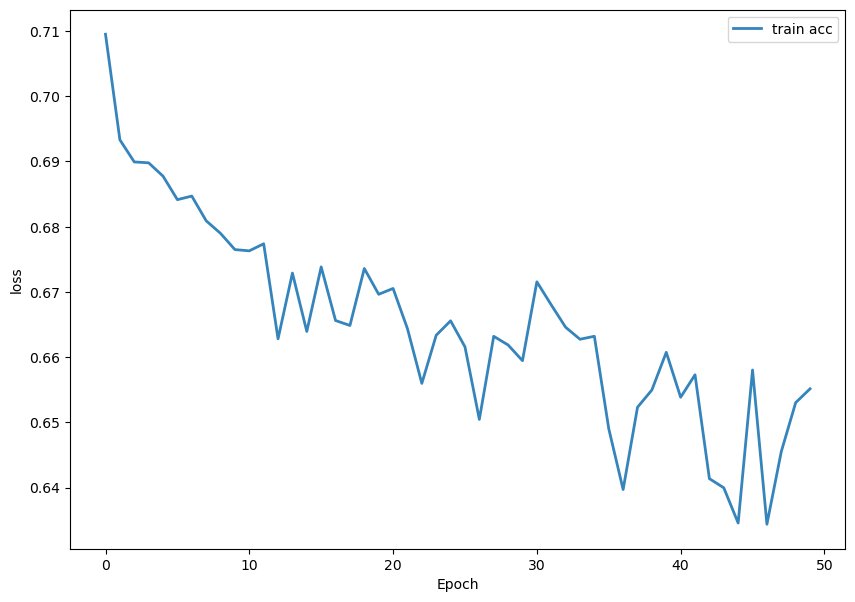

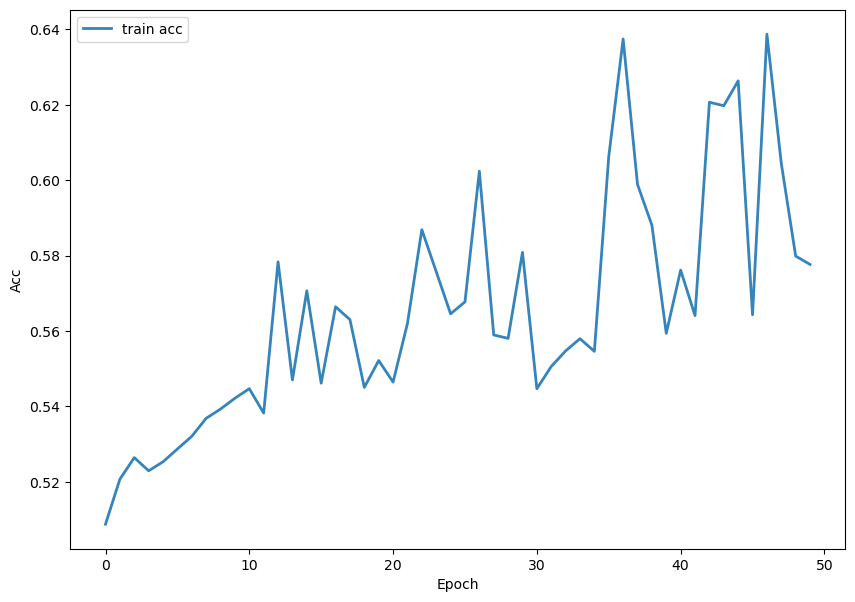

In [33]:
# 设置随机种子，以确保结果的可重复性
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed_all(1)
torch.backends.cudnn.deterministic = True  # 保证每次结果一样

start_time = time.time()
print("Loading data...")
vocab, train_data, dev_data, test_data = get_data()# 加载数据集
# 创建数据加载器
dataloaders = {
        'train': DataLoader(TextDataset(train_data), batch_size, shuffle=True),
        'dev': DataLoader(TextDataset(dev_data), batch_size, shuffle=True),
        'test': DataLoader(TextDataset(test_data), batch_size, shuffle=True)
}
end_time = time.time()
time_dif=end_time - start_time
print("Time usage:", time_dif)#数据处理用时
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')#设备选择
model = Model().to(device)
init_network(model)# 初始化模型参数
train(model, dataloaders)#进行模型训练及验证和评估
print('end')

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* <a href="https://d2l.ai/chapter_recurrent-neural-networks/index.html">Dive Into Deep Learning - Recurrent Neural Networks</a>
* <a href="https://atcold.github.io/pytorch-Deep-Learning/en/week12/12-1/">DS-GA 1008 - NYU CENTER FOR DATA SCIENCE - Deep Sequence Modeling</a>
* <a href="https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html">Text classification with the torchtext library
</a>
* <a href="https://www.borealisai.com/research-blogs/tutorial-17-transformers-iii-training/">Tricks For Training Transformers - Borealis AI - P. Xu, S. Prince</a>
* <a href="https://taldatech.github.io">Tal Daniel</a>